In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tnrange
import scipy.stats
import pandas as pd
from scipy.stats import rankdata
import matplotlib as mpl
from weightedcorr import WeightedCorr


In [2]:
rep_no = 5

C4_diff_all = np.zeros((rep_no, 2000,2000))
C4_nona_all = np.zeros((rep_no, 2000,2000))
C8_diff_all = np.zeros((rep_no, 2000,2000))
C8_nona_all = np.zeros((rep_no, 2000,2000))
C12_diff_all = np.zeros((rep_no, 2000,2000))
C12_nona_all = np.zeros((rep_no, 2000,2000))

C4_diff_scale_all = np.zeros((rep_no, 2000))
C4_nona_scale_all = np.zeros((rep_no, 2000))
C8_diff_scale_all = np.zeros((rep_no, 2000))
C8_nona_scale_all = np.zeros((rep_no, 2000))
C12_diff_scale_all = np.zeros((rep_no, 2000))
C12_nona_scale_all = np.zeros((rep_no, 2000))

C4_rand_all = np.zeros((rep_no, 2000, 2000))
C4_rand_scale_all = np.random.rand(rep_no, 2000)
C8_rand_all = np.zeros((rep_no, 2000, 2000))
C8_rand_scale_all = np.random.rand(rep_no, 2000)
C12_rand_all = np.zeros((rep_no, 2000, 2000))
C12_rand_scale_all = np.random.rand(rep_no, 2000)

for i in tnrange(rep_no):
    if i == 0:
        C4_diff_raw = np.load("/media/hdd01/sklee/CA1_clust4-60/clust/gru_s5_h20_pretrain_output_set"+str(i+1)+".npz")["C_syn_e"]
        C4_nona_raw = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/clust/gru_s5_h20_pretrain_output_set"+str(i+1)+".npz")["C_syn_e"]
        C8_diff_raw = np.load("/media/hdd01/sklee/CA1_clust8-30/clust/gru_s9_h20_pretrain_output_set"+str(i+1)+".npz")["C_syn_e"]
        C8_nona_raw = np.load("/media/hdd01/sklee/CA1_clust8-30_noNA/clust/gru_s9_h20_pretrain_output_set"+str(i+1)+".npz")["C_syn_e"]
        C12_diff_raw = np.load("/media/hdd01/sklee/CA1_clust12-20/clust/gru_s13_h20_pretrain_output_set"+str(i+1)+".npz")["C_syn_e"]
        C12_nona_raw = np.load("/media/hdd01/sklee/CA1_clust12-20_noNA/clust/gru_s13_h20_pretrain_output_set"+str(i+1)+".npz")["C_syn_e"]

        C4_dist_raw = np.load("/media/hdd01/sklee/CA1_clust4-60/data/clust4_syn_dist.npy")[:,-1]
        C8_dist_raw = np.load("/media/hdd01/sklee/CA1_clust8-30/data/clust8_syn_dist.npy")[:,-1]
        C12_dist_raw = np.load("/media/hdd01/sklee/CA1_clust12-20/data/clust12_syn_dist.npy")[:,-1]

        C4_diff_scale = np.load("/media/hdd01/sklee/CA1_clust4-60/clust/gru_s5_h20_pretrain_output_set"+str(i+1)+".npz")["E_scale"]
        C4_nona_scale = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/clust/gru_s5_h20_pretrain_output_set"+str(i+1)+".npz")["E_scale"]
        C8_diff_scale = np.load("/media/hdd01/sklee/CA1_clust8-30/clust/gru_s9_h20_pretrain_output_set"+str(i+1)+".npz")["E_scale"]
        C8_nona_scale = np.load("/media/hdd01/sklee/CA1_clust8-30_noNA/clust/gru_s9_h20_pretrain_output_set"+str(i+1)+".npz")["E_scale"]
        C12_diff_scale = np.load("/media/hdd01/sklee/CA1_clust12-20/clust/gru_s13_h20_pretrain_output_set"+str(i+1)+".npz")["E_scale"]
        C12_nona_scale = np.load("/media/hdd01/sklee/CA1_clust12-20_noNA/clust/gru_s13_h20_pretrain_output_set"+str(i+1)+".npz")["E_scale"]
    
    else:
        C4_diff_raw = np.load("/media/hdd01/sklee/CA1_clust4-60/clust/gru_s5_h20_pretrain_output_set"+str(i+1)+".npz")["C_syn_e"]
        C4_nona_raw = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/clust/gru_s5_h20_pretrain_output_set"+str(i+1)+".npz")["C_syn_e"]
        C8_diff_raw = np.load("/media/hdd01/sklee/CA1_clust8-30/clust/gru_s9_h20_pretrain_output_set"+str(i+1)+".npz")["C_syn_e"]
        C8_nona_raw = np.load("/media/hdd01/sklee/CA1_clust8-30_noNA/clust/gru_s9_h20_pretrain_output_set"+str(i+1)+".npz")["C_syn_e"]
        C12_diff_raw = np.load("/media/hdd01/sklee/CA1_clust12-20/clust/gru_s13_h20_pretrain_output_set"+str(i+1)+".npz")["C_syn_e"]
        C12_nona_raw = np.load("/media/hdd01/sklee/CA1_clust12-20_noNA/clust/gru_s13_h20_pretrain_output_set"+str(i+1)+".npz")["C_syn_e"]

        C4_dist_raw = np.load("/media/hdd01/sklee/CA1_clust4-60/data/clust4_syn_dist.npy")[:,-1]
        C8_dist_raw = np.load("/media/hdd01/sklee/CA1_clust8-30/data/clust8_syn_dist.npy")[:,-1]
        C12_dist_raw = np.load("/media/hdd01/sklee/CA1_clust12-20/data/clust12_syn_dist.npy")[:,-1]

        C4_diff_scale = np.load("/media/hdd01/sklee/CA1_clust4-60/clust/gru_s5_h20_pretrain_output_set"+str(i+1)+".npz")["E_scale"]
        C4_nona_scale = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/clust/gru_s5_h20_pretrain_output_set"+str(i+1)+".npz")["E_scale"]
        C8_diff_scale = np.load("/media/hdd01/sklee/CA1_clust8-30/clust/gru_s9_h20_pretrain_output_set"+str(i+1)+".npz")["E_scale"]
        C8_nona_scale = np.load("/media/hdd01/sklee/CA1_clust8-30_noNA/clust/gru_s9_h20_pretrain_output_set"+str(i+1)+".npz")["E_scale"]
        C12_diff_scale = np.load("/media/hdd01/sklee/CA1_clust12-20/clust/gru_s13_h20_pretrain_output_set"+str(i+1)+".npz")["E_scale"]
        C12_nona_scale = np.load("/media/hdd01/sklee/CA1_clust12-20_noNA/clust/gru_s13_h20_pretrain_output_set"+str(i+1)+".npz")["E_scale"]
    
    C4_diff_scale_all[i] = C4_diff_scale
    C4_nona_scale_all[i] = C4_nona_scale
    C8_diff_scale_all[i] = C8_diff_scale
    C8_nona_scale_all[i] = C8_nona_scale
    C12_diff_scale_all[i] = C12_diff_scale
    C12_nona_scale_all[i] = C12_nona_scale
    
    C4_diff_idx = np.zeros((2000))
    C4_nona_idx = np.zeros((2000))
    C8_diff_idx = np.zeros((2000))
    C8_nona_idx = np.zeros((2000))
    C12_diff_idx = np.zeros((2000))
    C12_nona_idx = np.zeros((2000))
    
    C4_rand_idx = np.random.randint(0,5,(2000))
    C8_rand_idx = np.random.randint(0,8,(2000))
    C12_rand_idx = np.random.randint(0,12,(2000))

    for j in range(2000):
        C4_diff_idx[j] = np.argmax(C4_diff_raw[:,j])
        C4_nona_idx[j] = np.argmax(C4_nona_raw[:,j])
        C8_diff_idx[j] = np.argmax(C8_diff_raw[:,j])
        C8_nona_idx[j] = np.argmax(C8_nona_raw[:,j])
        C12_diff_idx[j] = np.argmax(C12_diff_raw[:,j])
        C12_nona_idx[j] = np.argmax(C12_nona_raw[:,j])

    for j in range(2000):
        for k in range(2000):
            if C4_diff_idx[j] != C4_diff_idx[k]:
                C4_diff_all[i,j,k] = 1
                C4_diff_all[i,k,j] = 1
            if C4_nona_idx[j] != C4_nona_idx[k]:
                C4_nona_all[i,j,k] = 1
                C4_nona_all[i,k,j] = 1
            if C8_diff_idx[j] != C8_diff_idx[k]:
                C8_diff_all[i,j,k] = 1
                C8_diff_all[i,k,j] = 1
            if C8_nona_idx[j] != C8_nona_idx[k]:
                C8_nona_all[i,j,k] = 1
                C8_nona_all[i,k,j] = 1
            if C12_diff_idx[j] != C12_diff_idx[k]:
                C12_diff_all[i,j,k] = 1
                C12_diff_all[i,k,j] = 1
            if C12_nona_idx[j] != C12_nona_idx[k]:
                C12_nona_all[i,j,k] = 1
                C12_nona_all[i,k,j] = 1
            if C4_rand_idx[j] != C4_rand_idx[k]:
                C4_rand_all[i,j,k] = 1
                C4_rand_all[i,k,j] = 1
            if C8_rand_idx[j] != C8_rand_idx[k]:
                C8_rand_all[i,j,k] = 1
                C8_rand_all[i,k,j] = 1
            if C12_rand_idx[j] != C12_rand_idx[k]:
                C12_rand_all[i,j,k] = 1
                C12_rand_all[i,k,j] = 1

gru4_diff_subout = np.load("/media/hdd01/sklee/CA1_clust4-60/clust/gru_s5_h20_pretrain_output_set1.npz")["sub_out"][-1,:]
gru4_nona_subout = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/clust/gru_s5_h20_pretrain_output_set1.npz")["sub_out"][-1,:]
true4_dend_na = np.load("/media/hdd01/sklee/CA1_clust4-60/data/vDdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1_set1.npy").reshape(4,1000,50001)[:,-1,:50000]
true4_dend_nona = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/data/vDdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_noDendNa_Er0.5_Ir7.4_random_NR_rep1000_stimseed1_set1.npy").reshape(4,1000,50001)[:,-1,:50000]
true4_dend = true4_dend_na - true4_dend_nona
true4_dend_nona = true4_dend_nona - np.mean(true4_dend_nona, 1).reshape(-1,1)
gru4_nona_subout -= np.mean(gru4_nona_subout, 1).reshape(-1,1)
gru4_diff_subout -= np.mean(gru4_diff_subout, axis=1).reshape(-1,1)

/tmp/ipykernel_6036/2090799982.py:24: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for i in tnrange(rep_no):


  0%|          | 0/5 [00:00<?, ?it/s]

In [3]:
C4_clust_idx = np.zeros((2000))
C8_clust_idx = np.zeros((2000))
C12_clust_idx = np.zeros((2000))

for i in range(4):
    C4_clust_idx[880+60*i:880+60*(i+1)] = i+1
for i in range(8):
    C8_clust_idx[880+30*i:880+30*(i+1)] = i+1
for i in range(12):
    C12_clust_idx[880+20*i:880+20*(i+1)] = i+1
    
C4_clust = np.zeros((2000,2000))
C8_clust = np.zeros((2000,2000))
C12_clust = np.zeros((2000,2000))

for i in tnrange(2000):
    for j in range(2000):
        if C4_clust_idx[i] != C4_clust_idx[j]:
            C4_clust[i,j] = 1
            C4_clust[j,i] = 1
        if C8_clust_idx[i] != C8_clust_idx[j]:
            C8_clust[i,j] = 1
            C8_clust[j,i] = 1
        if C12_clust_idx[i] != C12_clust_idx[j]:
            C12_clust[i,j] = 1
            C12_clust[j,i] = 1

/tmp/ipykernel_6036/2949891472.py:16: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for i in tnrange(2000):


  0%|          | 0/2000 [00:00<?, ?it/s]

In [4]:
C4_dist = np.zeros((2000,2000))
C8_dist = np.zeros((2000,2000))
C12_dist = np.zeros((2000,2000))

for i in tnrange(2000):
    for j in range(2000):
        C4_dist[i,j] = np.abs(C4_dist_raw[i] - C4_dist_raw[j])
        C8_dist[i,j] = np.abs(C8_dist_raw[i] - C8_dist_raw[j])
        C12_dist[i,j] = np.abs(C12_dist_raw[i] - C12_dist_raw[j])

/tmp/ipykernel_6036/1104352508.py:5: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for i in tnrange(2000):


  0%|          | 0/2000 [00:00<?, ?it/s]

'\nC4_dist_bin_nona = np.zeros((2000*2000))\nC8_dist_bin_nona = np.zeros((2000*2000))\nC12_dist_bin_nona = np.zeros((2000*2000))\nC4_dist_bin_diff = np.zeros((2000*2000))\nC8_dist_bin_diff = np.zeros((2000*2000))\nC12_dist_bin_diff = np.zeros((2000*2000))\n\nthresh_dist_nona = np.asarray([96.21105791219199,201.4570872069728,224.00383024626842])\nthresh_dist_diff = np.asarray([0.0014969594585352297, 0.0014969594585352297,0.0014969594585352297])\n\nC4_thresh_dist_nona_idx = np.where(C4_dist.flatten() >= thresh_dist_nona[0])[0]\nC8_thresh_dist_nona_idx = np.where(C8_dist.flatten() >= thresh_dist_nona[1])[0]\nC12_thresh_dist_nona_idx = np.where(C12_dist.flatten() >= thresh_dist_nona[2])[0]\nC4_thresh_dist_diff_idx = np.where(C4_dist.flatten() >= thresh_dist_diff[0])[0]\nC8_thresh_dist_diff_idx = np.where(C8_dist.flatten() >= thresh_dist_diff[1])[0]\nC12_thresh_dist_diff_idx = np.where(C12_dist.flatten() >= thresh_dist_diff[2])[0]\n\nC4_dist_bin_nona[C4_thresh_dist_nona_idx] = 1\nC8_dist_bi

In [16]:
x, y = np.triu_indices(2000, k=0)
x_part, y_part = np.triu_indices(240, k=0)
x_part += 880
y_part += 880
x_mini, y_mini = np.triu_indices(240, k=0)

#C4_clust_vec = C4_clust[x_part,y_part]
#C8_clust_vec = C8_clust[x_part,y_part]
#C12_clust_vec = C12_clust[x_part,y_part]
#C4_dist_vec = C4_dist[x_part,y_part]
#C8_dist_vec = C8_dist[x_part,y_part]
#C12_dist_vec = C12_dist[x_part,y_part]

C4_clust_vec = C4_clust[x,y]
C8_clust_vec = C8_clust[x,y]
C12_clust_vec = C12_clust[x,y]
C4_dist_vec = C4_dist[x,y]
C8_dist_vec = C8_dist[x,y]
C12_dist_vec = C12_dist[x,y]

C4_orthog_vec = C4_clust_vec - C4_dist_vec * np.dot(C4_clust_vec, C4_dist_vec) / np.dot(C4_dist_vec, C4_dist_vec)
C8_orthog_vec = C8_clust_vec - C8_dist_vec * np.dot(C8_clust_vec, C8_dist_vec) / np.dot(C8_dist_vec, C8_dist_vec)
C12_orthog_vec = C12_clust_vec - C12_dist_vec * np.dot(C12_clust_vec, C12_dist_vec) / np.dot(C12_dist_vec, C12_dist_vec)

#C4_orthog = np.zeros((240,240))
#C8_orthog = np.zeros((240,240))
#C12_orthog = np.zeros((240,240))
C4_orthog = np.zeros((2000,2000))
C8_orthog = np.zeros((2000,2000))
C12_orthog = np.zeros((2000,2000))

#C4_orthog[x_mini,y_mini] = C4_orthog_vec
#C8_orthog[x_mini,y_mini] = C8_orthog_vec
#C12_orthog[x_mini,y_mini] = C12_orthog_vec
#C4_orthog[y_mini,x_mini] = C4_orthog_vec
#C8_orthog[y_mini,x_mini] = C8_orthog_vec
#C12_orthog[y_mini,x_mini] = C12_orthog_vec

C4_orthog[x,y] = C4_orthog_vec
C8_orthog[x,y] = C8_orthog_vec
C12_orthog[x,y] = C12_orthog_vec
C4_orthog[y,x] = C4_orthog_vec
C8_orthog[y,x] = C8_orthog_vec
C12_orthog[y,x] = C12_orthog_vec

print(np.dot(C4_clust_vec, C4_dist_vec) / np.dot(C4_dist_vec, C4_dist_vec))
print(np.dot(C8_clust_vec, C8_dist_vec) / np.dot(C8_dist_vec, C8_dist_vec))
print(np.dot(C12_clust_vec, C12_dist_vec) / np.dot(C12_dist_vec, C12_dist_vec))

0.0004479653685702104
0.0005027678509037785
0.0005152949968373093


In [17]:
x, y = np.triu_indices(2000, k=0)
x_part, y_part = np.triu_indices(240, k=0)
x_part += 880
y_part += 880
x_mini, y_mini = np.triu_indices(240, k=0)

corr_type = "pearson"

within_corrs_weighted = np.zeros((rep_no*(rep_no-1)//2,9))
across_corrs_weighted = np.zeros((rep_no**2,3))
dist_corrs_weighted = np.zeros((rep_no,9))
clust_corrs_weighted = np.zeros((rep_no,9))

C4_diff_scale_mat_all = np.matmul(C4_diff_scale_all.reshape(rep_no,-1,1), C4_diff_scale_all.reshape(rep_no,1,-1))
C4_nona_scale_mat_all = np.matmul(C4_nona_scale_all.reshape(rep_no,-1,1), C4_nona_scale_all.reshape(rep_no,1,-1))
C8_diff_scale_mat_all = np.matmul(C8_diff_scale_all.reshape(rep_no,-1,1), C8_diff_scale_all.reshape(rep_no,1,-1))
C8_nona_scale_mat_all = np.matmul(C8_nona_scale_all.reshape(rep_no,-1,1), C8_nona_scale_all.reshape(rep_no,1,-1))
C12_diff_scale_mat_all = np.matmul(C12_diff_scale_all.reshape(rep_no,-1,1), C12_diff_scale_all.reshape(rep_no,1,-1))
C12_nona_scale_mat_all = np.matmul(C12_nona_scale_all.reshape(rep_no,-1,1), C12_nona_scale_all.reshape(rep_no,1,-1))
C4_rand_scale_mat_all = np.matmul(C4_rand_scale_all.reshape(rep_no,-1,1), C4_rand_scale_all.reshape(rep_no,1,-1))
C8_rand_scale_mat_all = np.matmul(C8_rand_scale_all.reshape(rep_no,-1,1), C8_rand_scale_all.reshape(rep_no,1,-1))
C12_rand_scale_mat_all = np.matmul(C12_rand_scale_all.reshape(rep_no,-1,1), C12_rand_scale_all.reshape(rep_no,1,-1))

for i in tnrange(3):
    if i == 0:
        dist_mat = C4_dist
        #clust_mat = C4_clust
        clust_mat = C4_orthog
        diff_mat_all = C4_diff_all
        nona_mat_all = C4_nona_all
        diff_scale_mat_all = C4_diff_scale_mat_all
        nona_scale_mat_all = C4_nona_scale_mat_all
        rand_mat_all = C4_rand_all
        rand_scale_mat_all = C4_rand_scale_mat_all
        #dist_mat_bin_nona = C4_dist_bin_nona
        #dist_mat_bin_diff = C4_dist_bin_diff

    elif i == 1:
        dist_mat = C8_dist
        #clust_mat = C8_clust
        clust_mat = C8_orthog
        diff_mat_all = C8_diff_all
        nona_mat_all = C8_nona_all
        diff_scale_mat_all = C8_diff_scale_mat_all
        nona_scale_mat_all = C8_nona_scale_mat_all
        rand_mat_all = C8_rand_all
        rand_scale_mat_all = C8_rand_scale_mat_all
        #dist_mat_bin_nona = C8_dist_bin_nona
        #dist_mat_bin_diff = C8_dist_bin_diff

    elif i == 2:
        dist_mat = C12_dist
        #clust_mat = C12_clust
        clust_mat = C12_orthog
        diff_mat_all = C12_diff_all
        nona_mat_all = C12_nona_all
        diff_scale_mat_all = C12_diff_scale_mat_all
        nona_scale_mat_all = C12_nona_scale_mat_all
        rand_mat_all = C12_rand_all
        rand_scale_mat_all = C12_rand_scale_mat_all
        #dist_mat_bin_nona = C12_dist_bin_nona
        #dist_mat_bin_diff = C12_dist_bin_diff
        
    across_count = 0
    within_count = 0
    for j in range(rep_no):
        for k in range(rep_no):
            weight = diff_scale_mat_all[j][x,y] * nona_scale_mat_all[k][x,y]
            across_corr_val = WeightedCorr(x=pd.Series(diff_mat_all[j][x,y]),
                   y=pd.Series(nona_mat_all[k][x,y]),
                   w=pd.Series(weight))(method=corr_type)
            across_corrs_weighted[across_count,i] = across_corr_val
            across_count += 1
        for k in range(j+1,rep_no,1):
            diff_weight = diff_scale_mat_all[j][x,y] * diff_scale_mat_all[k][x,y]
            nona_weight = nona_scale_mat_all[j][x,y] * nona_scale_mat_all[k][x,y]
            within_diff_corr_val = WeightedCorr(x=pd.Series(diff_mat_all[j][x,y]),
                   y=pd.Series(diff_mat_all[k][x,y]),
                   w=pd.Series(diff_weight))(method=corr_type)
            within_nona_corr_val = WeightedCorr(x=pd.Series(nona_mat_all[j][x,y]),
                   y=pd.Series(nona_mat_all[k][x,y]),
                   w=pd.Series(nona_weight))(method=corr_type)
            within_corrs_weighted[within_count,i*2] = within_nona_corr_val
            within_corrs_weighted[within_count,i*2+1] = within_diff_corr_val
            
            rand_weight = rand_scale_mat_all[j][x,y] * rand_scale_mat_all[k][x,y]
            within_rand_corr_val = WeightedCorr(x=pd.Series(rand_mat_all[j][x,y]),
                   y=pd.Series(rand_mat_all[k][x,y]),
                   w=pd.Series(rand_weight))(method=corr_type)
            within_corrs_weighted[within_count,i+6] = within_rand_corr_val            
            
            within_count += 1
        
        nona_weight = nona_scale_mat_all[j][x,y]
        diff_weight = diff_scale_mat_all[j][x,y]
        
        dist_nona_corr_val = WeightedCorr(x=pd.Series(dist_mat[x,y]),
                   y=pd.Series(nona_mat_all[j][x,y]),
                   w=pd.Series(nona_weight))(method=corr_type)
        dist_diff_corr_val = WeightedCorr(x=pd.Series(dist_mat[x,y]),
                   y=pd.Series(diff_mat_all[j][x,y]),
                   w=pd.Series(diff_weight))(method=corr_type)

        dist_corrs_weighted[j,i*2] = dist_nona_corr_val
        dist_corrs_weighted[j,i*2+1] = dist_diff_corr_val
        rand_weight = rand_scale_mat_all[j][x,y]
        dist_rand_corr_val = WeightedCorr(x=pd.Series(dist_mat[x,y]),
                   y=pd.Series(rand_mat_all[j][x,y]),
                   w=pd.Series(rand_weight))(method=corr_type)
        dist_corrs_weighted[j,i+6] = dist_rand_corr_val
        
        """
        nona_weight_part = nona_scale_mat_all[j][x_part,y_part]
        diff_weight_part = diff_scale_mat_all[j][x_part,y_part]

        clust_nona_corr_val = WeightedCorr(x=pd.Series(clust_mat[x_mini,y_mini]),
                   y=pd.Series(nona_mat_all[j][x_part,y_part]),
                   w=pd.Series(nona_weight_part))(method=corr_type)
        clust_diff_corr_val = WeightedCorr(x=pd.Series(clust_mat[x_mini,y_mini]),
                   y=pd.Series(diff_mat_all[j][x_part,y_part]),
                   w=pd.Series(diff_weight_part))(method=corr_type)
        
        clust_corrs_weighted[j,i*2] = clust_nona_corr_val
        clust_corrs_weighted[j,i*2+1] = clust_diff_corr_val
        rand_weight_part = rand_scale_mat_all[j][x_part,y_part]

        clust_rand_corr_val = WeightedCorr(x=pd.Series(clust_mat[x_mini,y_mini]),
                   y=pd.Series(rand_mat_all[j][x_part,y_part]),
                   w=pd.Series(rand_weight_part))(method=corr_type)
        clust_corrs_weighted[j,i+6] = clust_rand_corr_val
        """
        nona_weight_part = nona_scale_mat_all[j][x,y]
        diff_weight_part = diff_scale_mat_all[j][x,y]

        clust_nona_corr_val = WeightedCorr(x=pd.Series(clust_mat[x,y]),
                   y=pd.Series(nona_mat_all[j][x,y]),
                   w=pd.Series(nona_weight_part))(method=corr_type)
        clust_diff_corr_val = WeightedCorr(x=pd.Series(clust_mat[x,y]),
                   y=pd.Series(diff_mat_all[j][x,y]),
                   w=pd.Series(diff_weight_part))(method=corr_type)
        
        clust_corrs_weighted[j,i*2] = clust_nona_corr_val
        clust_corrs_weighted[j,i*2+1] = clust_diff_corr_val
        rand_weight_part = rand_scale_mat_all[j][x,y]

        clust_rand_corr_val = WeightedCorr(x=pd.Series(clust_mat[x,y]),
                   y=pd.Series(rand_mat_all[j][x,y]),
                   w=pd.Series(rand_weight_part))(method=corr_type)
        clust_corrs_weighted[j,i+6] = clust_rand_corr_val

/tmp/ipykernel_6036/1488844496.py:24: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for i in tnrange(3):


  0%|          | 0/3 [00:00<?, ?it/s]

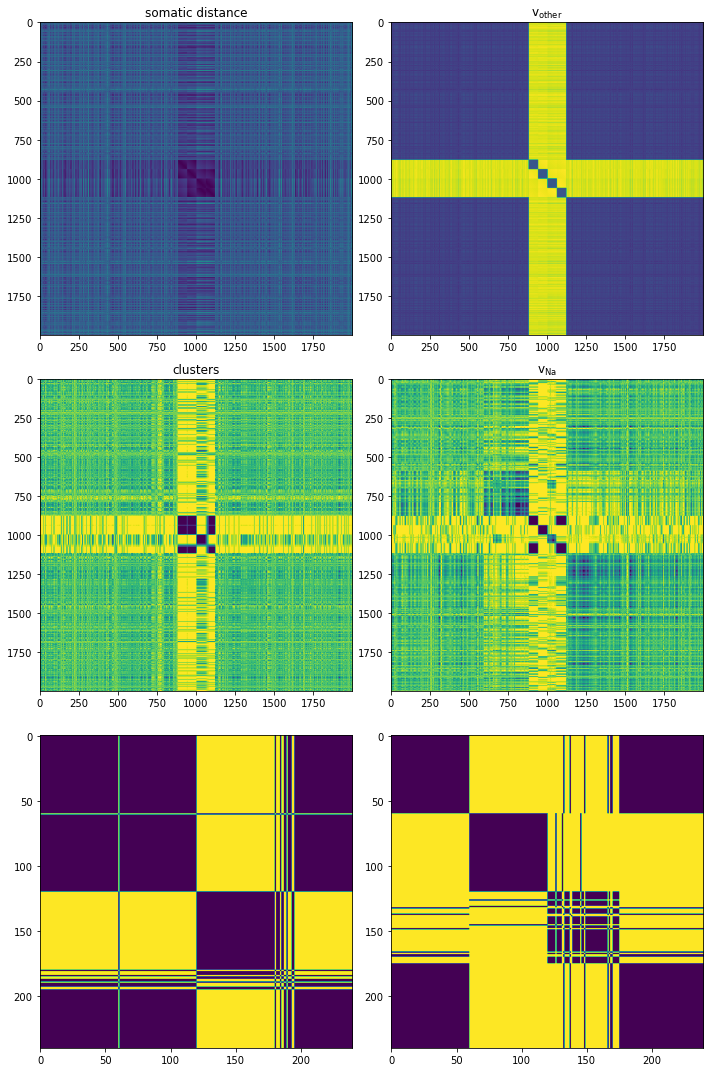

In [20]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10,15))

axs[0,0].imshow(C4_dist)
axs[0,1].imshow(C4_orthog)
axs[1,0].imshow(C4_nona_all[0])
axs[1,1].imshow(C4_diff_all[0])
axs[2,0].imshow(C4_nona_all[0,880:1120,880:1120])
axs[2,1].imshow(C4_diff_all[0,880:1120,880:1120])

axs[0,0].set_title("somatic distance")
axs[0,1].set_title("$\mathregular{v_{other}}$")
axs[1,0].set_title("clusters")
axs[1,1].set_title("$\mathregular{v_{Na}}$")

fig.tight_layout()
plt.show()

# Plot

/tmp/ipykernel_6036/2174393792.py:184: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
/home/sklee/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:137: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


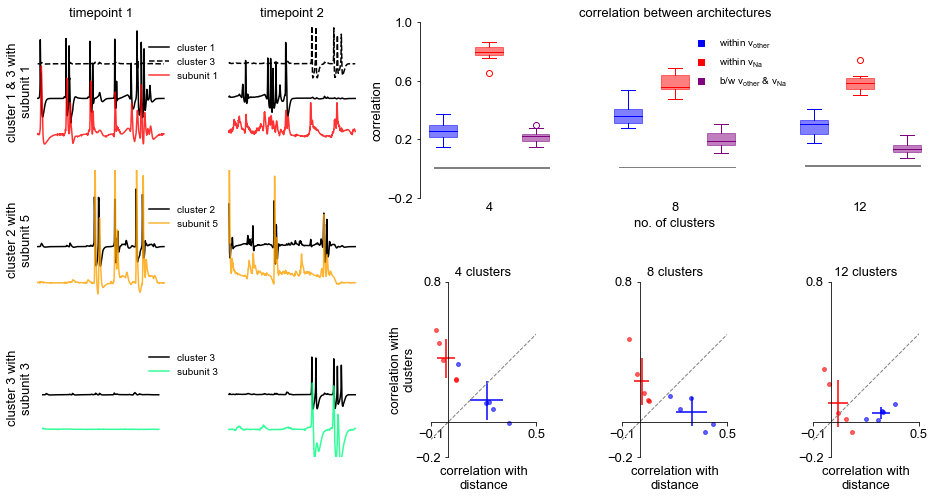

In [21]:
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.size'] = '13'

fig = plt.figure(constrained_layout=True, figsize = (16,8))
gs = fig.add_gridspec(12,5, wspace=0.5, hspace=0.35)
ax1 = fig.add_subplot(gs[:5,2:5])
#ax2 = fig.add_subplot(gs[:5,3])
ax21 = fig.add_subplot(gs[7:,2])
ax22 = fig.add_subplot(gs[7:,3])
ax23 = fig.add_subplot(gs[7:,4])
#ax4 = fig.add_subplot(gs[7:,3])
ax5 = fig.add_subplot(gs[:4,0])
ax6 = fig.add_subplot(gs[:4,1])
ax7 = fig.add_subplot(gs[4:8,0])
ax8 = fig.add_subplot(gs[4:8,1])
ax9 = fig.add_subplot(gs[8:,0])
ax10 = fig.add_subplot(gs[8:,1])


colors=["blue", "red",
        "blue", "red",
        "blue", "red"]
cap_colors=["blue", "blue", "red", "red",
           "blue", "blue", "red", "red",
           "blue", "blue", "red", "red"]
bp = ax1.boxplot(within_corrs_weighted[:,:-3], positions=[1,2,5,6,9,10], widths=0.6, patch_artist=True)
for i in range(6):
    plt.setp(bp['boxes'][i], facecolor=colors[i])
    plt.setp(bp['boxes'][i], alpha=0.5)
    plt.setp(bp["fliers"][i], markeredgecolor=colors[i])
    plt.setp(bp["boxes"][i], color=colors[i])
    plt.setp(bp["medians"][i], color=colors[i])
for i in range(12):
    plt.setp(bp['whiskers'][i], color=cap_colors[i])
    plt.setp(bp['caps'][i], color=cap_colors[i])

ax1.fill_between(np.arange(0.8,3.3,0.01), np.mean(within_corrs_weighted[:,-3])-np.std(within_corrs_weighted[:,-3]),
                 np.mean(within_corrs_weighted[:,-3])+np.std(within_corrs_weighted[:,-3]), color="gray")
ax1.fill_between(np.arange(4.8,7.3,0.01), np.mean(within_corrs_weighted[:,-2])-np.std(within_corrs_weighted[:,-2]),
                 np.mean(within_corrs_weighted[:,-2])+np.std(within_corrs_weighted[:,-2]), color="gray")
ax1.fill_between(np.arange(8.8,11.3,0.01), np.mean(within_corrs_weighted[:,-1])-np.std(within_corrs_weighted[:,-1]),
                 np.mean(within_corrs_weighted[:,-1])+np.std(within_corrs_weighted[:,-1]), color="gray")
    
hB = ax1.scatter(1,1,c='blue', marker="s")
hR = ax1.scatter(1,1,c='red', marker="s")
hP = ax1.scatter(1,1,c='purple', marker="s")
ax1.legend((hB, hR, hP),('within $\mathregular{v_{other}}$',
                         'within $\mathregular{v_{Na}}$',
                        'b/w $\mathregular{v_{other}}$ & $\mathregular{v_{Na}}$'),
           frameon=False, fontsize=10,
          loc=(0.525,0.6))
hB.set_visible(False)
hR.set_visible(False)
hP.set_visible(False)


##################################

bp1 = ax1.boxplot(across_corrs_weighted, positions=[3,7,11], widths=0.6, patch_artist=True)
colors=["purple", "purple", "purple"]
cap_colors=["purple", "purple", "purple", "purple", "purple", "purple"]
for i in range(across_corrs_weighted.shape[1]):
    plt.setp(bp1['boxes'][i], facecolor=colors[i])
    plt.setp(bp1['boxes'][i], alpha=0.5)
    plt.setp(bp1["fliers"][i], markeredgecolor=colors[i])
    plt.setp(bp1["boxes"][i], color=colors[i])
    plt.setp(bp1["medians"][i], color=colors[i])
for i in range(across_corrs_weighted.shape[1]*2):
    plt.setp(bp1['whiskers'][i], color=cap_colors[i])
    plt.setp(bp1['caps'][i], color=cap_colors[i])
    

ax1.set_ylim(-0.2,1)
ax1.set_yticks([-0.2,0.2,0.6,1.0])
ax1.spines.right.set_visible(False)
ax1.spines.top.set_visible(False)
ax1.spines.bottom.set_visible(False)
ax1.set_xticks([2, 6, 10])
ax1.set_xticklabels(["4", "8", "12"])
ax1.tick_params(axis="x", length=0)
ax1.set_xlabel("no. of clusters")
ax1.set_ylabel("correlation")
ax1.set_title("correlation between architectures",
             fontsize=13)

################################

ax21.scatter(dist_corrs_weighted[:,0], clust_corrs_weighted[:,0], s=15, color="blue", alpha=0.6)
ax21.scatter(dist_corrs_weighted[:,1], clust_corrs_weighted[:,1], s=15, color="red", alpha=0.6)
ax21.plot(np.linspace(-1,1,20), np.linspace(-1,1,20), linestyle="--", color="gray", linewidth=1)

ax22.scatter(dist_corrs_weighted[:,2], clust_corrs_weighted[:,2], s=15, color="blue", alpha=0.6)
ax22.scatter(dist_corrs_weighted[:,3], clust_corrs_weighted[:,3], s=15, color="red", alpha=0.6)
ax22.plot(np.linspace(-1,1,20), np.linspace(-1,1,20), linestyle="--", color="gray", linewidth=1)

ax23.scatter(dist_corrs_weighted[:,4], clust_corrs_weighted[:,4], s=15, color="blue", alpha=0.6)
ax23.scatter(dist_corrs_weighted[:,5], clust_corrs_weighted[:,5], s=15, color="red", alpha=0.6)
ax23.plot(np.linspace(-1,1,20), np.linspace(-1,1,20), linestyle="--", color="gray", linewidth=1)

ax21.set_xlim(-0.1,0.5)
ax21.set_ylim(-0.2,0.8)
ax22.set_xlim(-0.1,0.5)
ax22.set_ylim(-0.2,0.8)
ax23.set_xlim(-0.1,0.5)
ax23.set_ylim(-0.2,0.8)

ax21.set_ylabel("correlation with\nclusters", labelpad=0)
ax21.set_title("4 clusters", fontsize=13)
ax22.set_title("8 clusters", fontsize=13)
ax23.set_title("12 clusters", fontsize=13)

ax_list = [ax21, ax22, ax23]
for ax in ax_list:
    ax.spines['left'].set_position(('data', 0.0))
    ax.spines['bottom'].set_position(('data', 0.0))
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    ax.set_yticks([-0.2, 0.8])
    ax.set_xticks([-0.1, 0.5])
    ax.set_aspect('equal')
    ax.set_xlabel("correlation with\ndistance", labelpad=25)

ax_error_list = [ax21, ax21, ax22, ax22, ax23, ax23]
error_color_list = ["blue", "red", "blue", "red", "blue", "red"]
for i in range(len(ax_error_list)):
    ax_error_list[i].errorbar(np.mean(dist_corrs_weighted[:,i]), np.mean(clust_corrs_weighted[:,i]),
               xerr=np.std(dist_corrs_weighted[:,i]), yerr=np.std(clust_corrs_weighted[:,i]),
                             color=error_color_list[i])

################################

ax5.plot(true4_dend[0][17000:20000]+25, linewidth=1.5, color="black", label="cluster 1")
ax5.plot(true4_dend[2][17000:20000]+50, linewidth=1.5, color="black", label="cluster 3", linestyle="--")
ax5.plot(gru4_diff_subout[0][17000:20000]*50, linewidth=1.5, color="#ff0000", alpha=0.8, label="subunit 1")
ax5.set_ylabel("cluster 1 & 3 with\nsubunit 1")
ax5.set_title("timepoint 1", fontsize=13)
ax5.margins(x=0.005, y=0.005)
ax5.legend(loc=(0.85,0.55), frameon=False, fontsize=10)

ax6.plot(true4_dend[0][22500:25500]+25, linewidth=1.5, color="black")
ax6.plot(true4_dend[2][22500:25500]+50, linewidth=1.5, color="black", linestyle="--")
ax6.plot(gru4_diff_subout[0][22500:25500]*50, linewidth=1.5, color="#ff0000", alpha=0.8)
ax6.set_title("timepoint 2", fontsize=13)
ax6.margins(x=0.005, y=0.005)

ax7.plot(true4_dend[1][17000:20000]+25, linewidth=1.5, color="black", label="cluster 2")
ax7.plot(gru4_diff_subout[4][17000:20000]*50, linewidth=1.5, color="#ffa200", alpha=0.8, label="subunit 5")
ax7.set_ylabel("cluster 2 with\nsubunit 5")
#ax7.set_title("timepoint 1", fontsize=13)
ax7.margins(x=0.005, y=0.005)
ax7.legend(loc=(0.85,0.55), frameon=False, fontsize=10)

ax8.plot(true4_dend[1][22500:25500]+25, linewidth=1.5, color="black")
ax8.plot(gru4_diff_subout[4][22500:25500]*50, linewidth=1.5, color="#ffa200", alpha=0.8)
#ax8.set_title("timepoint 2", fontsize=13)
ax8.margins(x=0.005, y=0.005)

ax9.plot(true4_dend[2][17000:20000]+25, linewidth=1.5, color="black", label="cluster 3")
ax9.plot(gru4_diff_subout[2][17000:20000]*50, linewidth=1.5, color="#00ff80", alpha=0.8, label="subunit 3")
ax9.legend(loc=(0.85,0.55), frameon=False, fontsize=10)
ax9.set_ylabel("cluster 3 with\nsubunit 3")
#ax9.set_title("timepoint 1", fontsize=13)
#ax9.margins(x=0.005, y=0.005)

ax10.plot(true4_dend[2][22500:25500]+25, linewidth=1.5, color="black")
ax10.plot(gru4_diff_subout[2][22500:25500]*50, linewidth=1.5, color="#00ff80", alpha=0.8)
ax10.margins(x=0.005, y=0.005)
#ax10.set_title("timepoint 2", fontsize=13)

ax_list = [ax5, ax6, ax7, ax8, ax9, ax10]

for ax in ax_list:
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    ax.spines.bottom.set_visible(False)
    ax.spines.left.set_visible(False)
    ax.set_xticks([])
    ax.set_ylim(-20,80)
    ax.set_yticks([])


fig.tight_layout()
plt.show()
#fig.savefig("/home/sklee/dendrite/fig9/fig9_raw.pdf", bbox_inches="tight", transparent=True)

# old boxplots

In [ ]:
####################################
bp = ax3.boxplot(dist_corrs_weighted[:,:-3], positions=[1,2,4,5,7,8], widths=0.6, patch_artist=True)
colors=["blue", "red", "blue", "red", "blue", "red"]
cap_colors=["blue", "blue", "red", "red",
           "blue", "blue", "red", "red",
           "blue", "blue", "red", "red"]
for i in range(dist_corrs_weighted[:,:-3].shape[1]):
    plt.setp(bp['boxes'][i], facecolor=colors[i])
    plt.setp(bp['boxes'][i], alpha=0.5)
    plt.setp(bp["fliers"][i], markeredgecolor=colors[i])
    plt.setp(bp["boxes"][i], color=colors[i])
    plt.setp(bp["medians"][i], color=colors[i])
for i in range(dist_corrs_weighted[:,:-3].shape[1]*2):
    plt.setp(bp['whiskers'][i], color=cap_colors[i])
    plt.setp(bp['caps'][i], color=cap_colors[i])
ax3.fill_between(np.arange(0.8,2.3,0.01), np.mean(dist_corrs_weighted[:,-3])-np.std(dist_corrs_weighted[:,-3]),
                 np.mean(dist_corrs_weighted[:,-3])+np.std(dist_corrs_weighted[:,-3]), color="gray")
ax3.fill_between(np.arange(3.8,5.3,0.01), np.mean(dist_corrs_weighted[:,-2])-np.std(dist_corrs_weighted[:,-2]),
                 np.mean(dist_corrs_weighted[:,-2])+np.std(dist_corrs_weighted[:,-2]), color="gray")
ax3.fill_between(np.arange(6.8,8.3,0.01), np.mean(dist_corrs_weighted[:,-1])-np.std(dist_corrs_weighted[:,-1]),
                 np.mean(dist_corrs_weighted[:,-1])+np.std(dist_corrs_weighted[:,-1]), color="gray")

ax3.set_ylim(-0.2,1)
ax3.set_yticks([-0.2,0.2,0.6,1.0])
ax3.spines.right.set_visible(False)
ax3.spines.top.set_visible(False)
ax3.spines.bottom.set_visible(False)
ax3.set_xticks([1.5, 4.5, 7.5])
ax3.set_xticklabels(["4", "8", "12"])
ax3.tick_params(axis="x", length=0)
ax3.set_xlabel("no. of clusters")
ax3.set_ylabel("correlation")
ax3.set_title("correlation between architecture\nand somatic distance",
             fontsize=13)

####################################
bp = ax4.boxplot(clust_corrs_weighted[:,:-3], positions=[1,2,4,5,7,8], widths=0.6, patch_artist=True)
colors=["blue", "red", "blue", "red", "blue", "red"]
cap_colors=["blue", "blue", "red", "red",
           "blue", "blue", "red", "red",
           "blue", "blue", "red", "red"]
for i in range(clust_corrs_weighted[:,:-3].shape[1]):
    plt.setp(bp['boxes'][i], facecolor=colors[i])
    plt.setp(bp['boxes'][i], alpha=0.5)
    plt.setp(bp["fliers"][i], markeredgecolor=colors[i])
    plt.setp(bp["boxes"][i], color=colors[i])
    plt.setp(bp["medians"][i], color=colors[i])
for i in range(clust_corrs_weighted[:,:-3].shape[1]*2):
    plt.setp(bp['whiskers'][i], color=cap_colors[i])
    plt.setp(bp['caps'][i], color=cap_colors[i])
ax4.fill_between(np.arange(0.8,2.3,0.01), np.mean(clust_corrs_weighted[:,-3])-np.std(clust_corrs_weighted[:,-3]),
                 np.mean(clust_corrs_weighted[:,-3])+np.std(clust_corrs_weighted[:,-3]), color="gray")
ax4.fill_between(np.arange(3.8,5.3,0.01), np.mean(clust_corrs_weighted[:,-2])-np.std(clust_corrs_weighted[:,-2]),
                 np.mean(clust_corrs_weighted[:,-2])+np.std(clust_corrs_weighted[:,-2]), color="gray")
ax4.fill_between(np.arange(6.8,8.3,0.01), np.mean(clust_corrs_weighted[:,-1])-np.std(clust_corrs_weighted[:,-1]),
                 np.mean(clust_corrs_weighted[:,-1])+np.std(clust_corrs_weighted[:,-1]), color="gray")

ax4.set_ylim(-0.2,1)
ax4.set_yticks([-0.2,0.2,0.6,1.0])
ax4.spines.right.set_visible(False)
ax4.spines.top.set_visible(False)
ax4.spines.bottom.set_visible(False)
ax4.set_xticks([1.5, 4.5, 7.5])
ax4.set_xticklabels(["4", "8", "12"])
ax4.tick_params(axis="x", length=0)
ax4.set_xlabel("no. of clusters")
ax4.set_title("correlation between\narchitecture and clusters",
             fontsize=13)

# thresh find

In [ ]:
gap_no = 50
x, y = np.triu_indices(2000, k=0)
x_part, y_part = np.triu_indices(240, k=0)
corr_vals = np.zeros((rep_no, gap_no, 3))
distance_matrix = C12_dist
unique_dist = np.unique(distance_matrix)

for n in range(rep_no):
    weight_matrix = C12_nona_scale_mat_all[n][x,y]
    subunit_matrix = C12_nona_all[n][x,y]

    for i in tnrange(gap_no):
        dist_bin = np.zeros((2000*2000))
        thresh_gap = unique_dist.shape[0] // gap_no
        thresh_gap = 20000 // gap_no
        #thresh_gap = 1
        idx = np.where(distance_matrix.flatten() >= unique_dist[i*thresh_gap+220000])[0]
        dist_bin[idx] = 1
        dist_bin = dist_bin.reshape((2000,2000))

        dist_corr_val = WeightedCorr(x=pd.Series(dist_bin[x,y]),
                       y=pd.Series(subunit_matrix),
                       w=pd.Series(weight_matrix))(method='spearman')
        corr_vals[n,i,0] = i*thresh_gap+220000
        corr_vals[n,i,1] = unique_dist[i*thresh_gap+220000]
        corr_vals[n,i,2] = dist_corr_val

# heatmap

In [ ]:
C4_diff_rep_corr_weighted = np.zeros((rep_no, rep_no))
C4_nona_rep_corr_weighted = np.zeros((rep_no, rep_no))
C8_diff_rep_corr_weighted = np.zeros((rep_no, rep_no))
C8_nona_rep_corr_weighted = np.zeros((rep_no, rep_no))
C12_diff_rep_corr_weighted = np.zeros((rep_no, rep_no))
C12_nona_rep_corr_weighted = np.zeros((rep_no, rep_no))

within_count = 0
for i in range(rep_no):
    for j in range(i+1,rep_no,1):
        C4_nona_rep_corr_weighted[i,j] = within_corrs_weighted[within_count, 0]
        C4_nona_rep_corr_weighted[j,i] = within_corrs_weighted[within_count, 0]
        C4_diff_rep_corr_weighted[i,j] = within_corrs_weighted[within_count, 1]
        C4_diff_rep_corr_weighted[j,i] = within_corrs_weighted[within_count, 1]
        C8_nona_rep_corr_weighted[i,j] = within_corrs_weighted[within_count, 2]
        C8_nona_rep_corr_weighted[j,i] = within_corrs_weighted[within_count, 2]
        C8_diff_rep_corr_weighted[i,j] = within_corrs_weighted[within_count, 3]
        C8_diff_rep_corr_weighted[j,i] = within_corrs_weighted[within_count, 3]
        C12_nona_rep_corr_weighted[i,j] = within_corrs_weighted[within_count, 4]
        C12_nona_rep_corr_weighted[j,i] = within_corrs_weighted[within_count, 4]
        C12_diff_rep_corr_weighted[i,j] = within_corrs_weighted[within_count, 5]
        C12_diff_rep_corr_weighted[j,i] = within_corrs_weighted[within_count, 5]
        
        within_count += 1

C4_diff_heatmap_weighted = np.zeros((rep_no+3, rep_no))
C4_nona_heatmap_weighted = np.zeros((rep_no+3, rep_no))
C8_diff_heatmap_weighted = np.zeros((rep_no+3, rep_no))
C8_nona_heatmap_weighted = np.zeros((rep_no+3, rep_no))
C12_diff_heatmap_weighted = np.zeros((rep_no+3, rep_no))
C12_nona_heatmap_weighted = np.zeros((rep_no+3, rep_no))

C4_nona_heatmap_weighted[:rep_no,:] = C4_nona_rep_corr_weighted
C4_nona_heatmap_weighted[-3,:] = dist_corrs_weighted[:,0]
C4_diff_heatmap_weighted[:rep_no,:] = C4_diff_rep_corr_weighted
C4_diff_heatmap_weighted[-3,:] = dist_corrs_weighted[:,1]
C8_nona_heatmap_weighted[:rep_no,:] = C8_nona_rep_corr_weighted
C8_nona_heatmap_weighted[-3,:] = dist_corrs_weighted[:,2]
C8_diff_heatmap_weighted[:rep_no,:] = C8_diff_rep_corr_weighted
C8_diff_heatmap_weighted[-3,:] = dist_corrs_weighted[:,3]
C12_nona_heatmap_weighted[:rep_no,:] = C12_nona_rep_corr_weighted
C12_nona_heatmap_weighted[-3,:] = dist_corrs_weighted[:,4]
C12_diff_heatmap_weighted[:rep_no,:] = C12_diff_rep_corr_weighted
C12_diff_heatmap_weighted[-3,:] = dist_corrs_weighted[:,5]

for i in tnrange(rep_no):
    C4_nona_rand = WeightedCorr(x=pd.Series(C4_rand_all[i][x,y]),
                   y=pd.Series(C4_nona_all[i][x,y]),
                   w=pd.Series(C4_nona_scale_mat_all[i][x,y]))(method=corr_type)
    C4_diff_rand = WeightedCorr(x=pd.Series(C4_rand_all[i][x,y]),
                   y=pd.Series(C4_diff_all[i][x,y]),
                   w=pd.Series(C4_diff_scale_mat_all[i][x,y]))(method=corr_type)
    C8_nona_rand = WeightedCorr(x=pd.Series(C8_rand_all[i][x,y]),
                   y=pd.Series(C4_nona_all[i][x,y]),
                   w=pd.Series(C4_nona_scale_mat_all[i][x,y]))(method=corr_type)
    C8_diff_rand = WeightedCorr(x=pd.Series(C8_rand_all[i][x,y]),
                   y=pd.Series(C4_diff_all[i][x,y]),
                   w=pd.Series(C4_diff_scale_mat_all[i][x,y]))(method=corr_type)
    C12_nona_rand = WeightedCorr(x=pd.Series(C12_rand_all[i][x,y]),
                   y=pd.Series(C12_nona_all[i][x,y]),
                   w=pd.Series(C12_nona_scale_mat_all[i][x,y]))(method=corr_type)
    C12_diff_rand = WeightedCorr(x=pd.Series(C12_rand_all[i][x,y]),
                   y=pd.Series(C12_diff_all[i][x,y]),
                   w=pd.Series(C12_diff_scale_mat_all[i][x,y]))(method=corr_type)
    
    C4_nona_clust = WeightedCorr(x=pd.Series(C4_clust[x_part,y_part]),
                   y=pd.Series(C4_nona_all[i][x_part,y_part]),
                   w=pd.Series(C4_nona_scale_mat_all[i][x_part,y_part]))(method=corr_type)
    C4_diff_clust = WeightedCorr(x=pd.Series(C4_clust[x_part,y_part]),
                   y=pd.Series(C4_diff_all[i][x_part,y_part]),
                   w=pd.Series(C4_diff_scale_mat_all[i][x_part,y_part]))(method=corr_type)
    C8_nona_clust = WeightedCorr(x=pd.Series(C8_clust[x_part,y_part]),
                   y=pd.Series(C4_nona_all[i][x_part,y_part]),
                   w=pd.Series(C4_nona_scale_mat_all[i][x_part,y_part]))(method=corr_type)
    C8_diff_clust = WeightedCorr(x=pd.Series(C8_clust[x_part,y_part]),
                   y=pd.Series(C4_diff_all[i][x_part,y_part]),
                   w=pd.Series(C4_diff_scale_mat_all[i][x_part,y_part]))(method=corr_type)
    C12_nona_clust = WeightedCorr(x=pd.Series(C12_clust[x_part,y_part]),
                   y=pd.Series(C12_nona_all[i][x_part,y_part]),
                   w=pd.Series(C12_nona_scale_mat_all[i][x_part,y_part]))(method=corr_type)
    C12_diff_clust = WeightedCorr(x=pd.Series(C12_clust[x_part,y_part]),
                   y=pd.Series(C12_diff_all[i][x_part,y_part]),
                   w=pd.Series(C12_diff_scale_mat_all[i][x_part,y_part]))(method=corr_type)
    
    C4_nona_heatmap_weighted[-1,i] = C4_nona_rand
    C4_diff_heatmap_weighted[-1,i] = C4_diff_rand
    C8_nona_heatmap_weighted[-1,i] = C8_nona_rand
    C8_diff_heatmap_weighted[-1,i] = C8_diff_rand
    C12_nona_heatmap_weighted[-1,i] = C12_nona_rand
    C12_diff_heatmap_weighted[-1,i] = C12_diff_rand
    C4_nona_heatmap_weighted[-2,i] = C4_nona_clust
    C4_diff_heatmap_weighted[-2,i] = C4_diff_clust
    C8_nona_heatmap_weighted[-2,i] = C8_nona_clust
    C8_diff_heatmap_weighted[-2,i] = C8_diff_clust
    C12_nona_heatmap_weighted[-2,i] = C12_nona_clust
    C12_diff_heatmap_weighted[-2,i] = C12_diff_clust